<a href="https://colab.research.google.com/github/gaesu96/gaesu_public/blob/main/project_faster_rcnn_pretrainedmodel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
!mkdir /content/data

In [10]:
!mkdir ./pretrained
!wget -O ./pretrained/faster_rcnn_resnet50_coco_2018_01_28.tar.gz http://download.tensorflow.org/models/object_detection/faster_rcnn_resnet50_coco_2018_01_28.tar.gz
!wget -O ./pretrained/config_graph.pbtxt https://raw.githubusercontent.com/opencv/opencv_extra/master/testdata/dnn/faster_rcnn_resnet50_coco_2018_01_28.pbtxt

--2024-04-30 15:03:36--  http://download.tensorflow.org/models/object_detection/faster_rcnn_resnet50_coco_2018_01_28.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 108.177.97.207, 108.177.125.207, 142.250.157.207, ...
Connecting to download.tensorflow.org (download.tensorflow.org)|108.177.97.207|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 381355771 (364M) [application/x-tar]
Saving to: ‘./pretrained/faster_rcnn_resnet50_coco_2018_01_28.tar.gz’

./pretrained/faster 100%[===================>] 363.69M  16.8MB/s    in 24s     

2024-04-30 15:04:00 (14.9 MB/s) - ‘./pretrained/faster_rcnn_resnet50_coco_2018_01_28.tar.gz’ saved [381355771/381355771]

--2024-04-30 15:04:00--  https://raw.githubusercontent.com/opencv/opencv_extra/master/testdata/dnn/faster_rcnn_resnet50_coco_2018_01_28.pbtxt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercont

In [11]:
!tar -xvf ./pretrained/faster*.tar.gz -C ./pretrained
!pwd
!ls -lia ./pretrained/faster_rcnn_resnet50_coco_2018_01_28

faster_rcnn_resnet50_coco_2018_01_28/
faster_rcnn_resnet50_coco_2018_01_28/model.ckpt.index
faster_rcnn_resnet50_coco_2018_01_28/checkpoint
faster_rcnn_resnet50_coco_2018_01_28/pipeline.config
faster_rcnn_resnet50_coco_2018_01_28/model.ckpt.data-00000-of-00001
faster_rcnn_resnet50_coco_2018_01_28/model.ckpt.meta
faster_rcnn_resnet50_coco_2018_01_28/saved_model/
faster_rcnn_resnet50_coco_2018_01_28/saved_model/saved_model.pb
faster_rcnn_resnet50_coco_2018_01_28/saved_model/variables/
faster_rcnn_resnet50_coco_2018_01_28/frozen_inference_graph.pb
/content
total 296076
2495119 drwxr-xr-x 3 345018 5000      4096 Feb  1  2018 .
2495115 drwxr-xr-x 3 root   root      4096 Apr 30 15:04 ..
2495121 -rw-r--r-- 1 345018 5000        77 Feb  1  2018 checkpoint
2495128 -rw-r--r-- 1 345018 5000 120549957 Feb  1  2018 frozen_inference_graph.pb
2495123 -rw-r--r-- 1 345018 5000 176914228 Feb  1  2018 model.ckpt.data-00000-of-00001
2495120 -rw-r--r-- 1 345018 5000     14460 Feb  1  2018 model.ckpt.index
2

In [13]:
import cv2
cv_net = cv2.dnn.readNetFromTensorflow('./pretrained/faster_rcnn_resnet50_coco_2018_01_28/frozen_inference_graph.pb',
                                     './pretrained/config_graph.pbtxt')

In [19]:
# OpenCV Tensorflow Faster-RCNN용
labels_to_names_0 = {0:'person',1:'bicycle',2:'car',3:'motorcycle',4:'airplane',5:'bus',6:'train',7:'truck',8:'boat',9:'traffic light',
                    10:'fire hydrant',11:'street sign',12:'stop sign',13:'parking meter',14:'bench',15:'bird',16:'cat',17:'dog',18:'horse',19:'sheep',
                    20:'cow',21:'elephant',22:'bear',23:'zebra',24:'giraffe',25:'hat',26:'backpack',27:'umbrella',28:'shoe',29:'eye glasses',
                    30:'handbag',31:'tie',32:'suitcase',33:'frisbee',34:'skis',35:'snowboard',36:'sports ball',37:'kite',38:'baseball bat',39:'baseball glove',
                    40:'skateboard',41:'surfboard',42:'tennis racket',43:'bottle',44:'plate',45:'wine glass',46:'cup',47:'fork',48:'knife',49:'spoon',
                    50:'bowl',51:'banana',52:'apple',53:'sandwich',54:'orange',55:'broccoli',56:'carrot',57:'hot dog',58:'pizza',59:'donut',
                    60:'cake',61:'chair',62:'couch',63:'potted plant',64:'bed',65:'mirror',66:'dining table',67:'window',68:'desk',69:'toilet',
                    70:'door',71:'tv',72:'laptop',73:'mouse',74:'remote',75:'keyboard',76:'cell phone',77:'microwave',78:'oven',79:'toaster',
                    80:'sink',81:'refrigerator',82:'blender',83:'book',84:'clock',85:'vase',86:'scissors',87:'teddy bear',88:'hair drier',89:'toothbrush',
                    90:'hair brush'}

In [67]:
import time

def get_detected_img(cv_net, img_array, score_threshold, is_print=True):

    rows = img_array.shape[0]
    cols = img_array.shape[1]

    draw_img = img_array.copy()

    cv_net.setInput(cv2.dnn.blobFromImage(img_array, size=(300, 300), swapRB=True, crop=False))

    start = time.time()
    cv_out = cv_net.forward()

    green_color=(0, 255, 0)
    red_color=(0, 0, 255)
    target_x, target_y = 300, 200  # 특정 위치의 x, y 좌표
    target_left = 20
    target_top = 272
    target_right = 612
    target_bottom = 1908
    # detected 된 object들을 iteration 하면서 정보 추출
    for detection in cv_out[0,0,:,:]:
        score = float(detection[2])
        class_id = int(detection[1])
        # detected된 object들의 score가 0.4 이상만 추출
        if score > score_threshold:
            # detected된 object들은 image 크기가 (300, 300)으로 scale된 기준으로 예측되었으므로 다시 원본 이미지 비율로 계산
            left = detection[3] * cols
            top = detection[4] * rows
            right = detection[5] * cols
            bottom = detection[6] * rows
            # labels_to_names 딕셔너리로 class_id값을 클래스명으로 변경. opencv에서는 class_id + 1로 매핑해야함.
            caption = "{}: {:.4f}".format(labels_to_names_0[class_id], score)

            #cv2.rectangle()은 인자로 들어온 draw_img에 사각형을 그림. 위치 인자는 반드시 정수형.
            cv2.rectangle(draw_img, (int(left), int(top)), (int(right), int(bottom)), color=green_color, thickness=2)
            cv2.rectangle(draw_img, (int(target_left), int(target_top)), (int(target_right), int(target_bottom)), color=(255, 0, 0), thickness=2)
            if (left > target_left) and (right < target_right) and (top > target_top) and (bottom < target_bottom):
              cv2.putText(draw_img, "danger", (int(left), int(top - 5)), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)
            else:
              cv2.putText(draw_img, caption, (int(left), int(top - 5)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, red_color, 2)
            print([left, right, top, bottom])
    if is_print:
        print('Detection 수행시간:',round(time.time() - start, 2),"초")

    return draw_img

In [32]:
def do_detected_video(cv_net, input_path, output_path, score_threshold, is_print):

    cap = cv2.VideoCapture(input_path)

    codec = cv2.VideoWriter_fourcc(*'XVID')

    vid_size = (round(cap.get(cv2.CAP_PROP_FRAME_WIDTH)),round(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)))
    vid_fps = cap.get(cv2.CAP_PROP_FPS)

    vid_writer = cv2.VideoWriter(output_path, codec, vid_fps, vid_size)

    frame_cnt = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    print('총 Frame 갯수:', frame_cnt, )


    green_color=(0, 255, 0)
    red_color=(0, 0, 255)
    frame_count = 0
    while True:
        hasFrame, img_frame = cap.read()
        if not hasFrame:
            print('더 이상 처리할 frame이 없습니다.')
            break

        returned_frame = get_detected_img(cv_net, img_frame, score_threshold=score_threshold, is_print=True)
        vid_writer.write(returned_frame)
    # end of while loop

    vid_writer.release()
    cap.release()

In [70]:
img = cv2.imread('/content/data/image.png')
detect_img = get_detected_img(cv_net, img, 0.3, is_print=True)
detect_img = cv2.cvtColor(detect_img, cv2.COLOR_BGR2RGB)

[270.84550738334656, 417.0272934436798, 1083.3346939086914, 1347.8921127319336]
[5.0161707401275635, 532.1004974842072, 1285.3756713867188, 1679.011459350586]
[266.67603492736816, 449.83232975006104, 1087.899284362793, 1523.7694931030273]
Detection 수행시간: 4.3 초


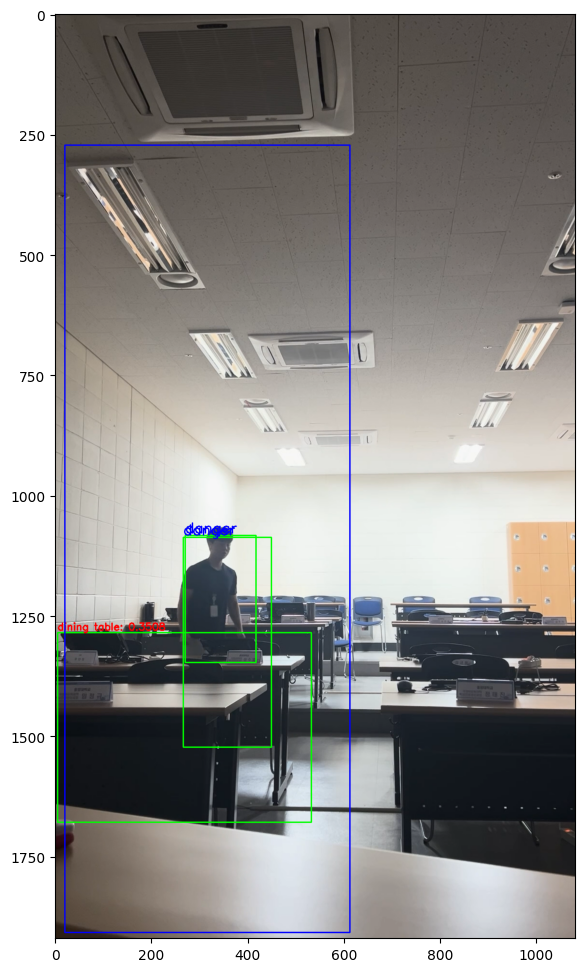

In [71]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,12))
plt.imshow(detect_img)

In [23]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
